## Lab 8 Worksheet 

In this worksheet we look at two topographic methods for dimensionality reduction.

## t-distributed Stochastic Neighbourhood Embedding

The first code block contains useful imports and variable initialisations.

(Light-hearted quiz question - why is the number 1729 interesting?).


In [1]:
# Imports
import mnist_reader
import fashion_scatter as fs

import time
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

%matplotlib inline

RS = 1729; # Fix the random state for t-SNE. This makes the lab results reproducible.

The dataset you will use for this section of the lab class is the Fashion-MNIST dataset. This dataset consists of 28x28 grayscale image of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

The classes and their labels are given by the following list:
<ull>
    <li>0 T-shirt/top</li>
    <li>1 Trouser</li>
    <li>2 Pullover</li>
    <li>3 Dress</li>
    <li>4 Coat</li>
    <li>5 Sandal</li>
    <li>6 Shirt</li>
    <li>7 Sneaker</li>
    <li>8 Bag</li>
    <li>9 Ankle boot</li>
    </ul>

Use the function `load_mnist` provided on Blackboard to read the datasets into variables `X_train` (image data) and `y_train` (labels) and print the shape of `X_train`. The argument to `load_mnist` is the path where you have stored the image zip files relative to the directory that this notebook is stored in.

In [3]:
# TODO block 1
X_train, y_train = mnist_reader.load_mnist('./dataset', kind='train')
# 60000 images, each of 28x28 pixels

60,000 data points is a healthy size of dataset. But for running experiments, it will be more convenient to work with a smaller subset. Write code to take a slice of the first 1000 points from both the X and y arrays. Check that we have examples of all the labels by calling `np.unique` on the y subset.

60000个数据点是一个健康的数据集大小。但是为了运行实验，使用较小的子集会更方便。编写代码从X和y数组中获取前1000个点的切片。通过在y子集上调用`np.unique`来检查我们是否有所有标签的示例。

In [6]:
#TODO block 
xsubset = X_train[:1000]
ysubset = y_train[:1000]

np.unique(ysubset)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Next we are going to apply PCA to this dataset and look at the resulting visualisation. Write code to apply the `PCA` class 
    from `sklearn.decomposition`, extracting four components. (Hint: you need two lines of code: one to call the constructor PCA to set the right number of components; the second should call the `fit_transform` function on `xsubset`. Look at the class documentation to see how to do this.)

Make a note of the time elapsed and the proportion of variance explained for these four components. 

接下来，我们将对此数据集应用PCA并查看结果可视化。编写代码应用`sklearn.decomposition`中的`PCA`类，提取四个组件。 （提示：您需要两行代码：一行调用构造函数PCA设置正确数量的组件；第二个应该在`xsubset`上调用`fit_transform`函数。查看类文档以了解如何执行此操作。）

记录经过的时间和这四个组件的方差比。

In [7]:
# TODO block 3
from sklearn.decomposition import PCA

time_start = time.time()
pca = PCA(n_components=4)
pca_result = pca.fit_transform(xsubset)

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 0.025992155075073242 seconds
Variance explained per principal component: [0.29550168 0.17639341 0.05725013 0.0538202 ]


Use the first two components from the data frame in the cell below and 
call the function `fashion_scatter` to visualise the PCA output.

在下面的单元格中使用数据框中的前两个组件，并调用函数`fashion_scatter`来可视化PCA输出。

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(850.366174070131, -684.9519804949516, '0'),
  Text(149.52836758881938, -1432.7298513649187, '1'),
  Text(1255.498592631813, 513.52807623776, '2'),
  Text(501.1292368759664, -1084.3713704137017, '3'),
  Text(1172.5076117256665, 368.81803961296913, '4'),
  Text(-1604.8430992325618, 9.078778791845952, '5'),
  Text(673.2763199935096, -4.331368308103184, '6'),
  Text(-1518.4557966841799, 310.2190674019649, '7'),
  Text(1.3813689870000712, 904.0484650755632, '8'),
  Text(-723.5498129917373, 1099.32925855911, '9')])

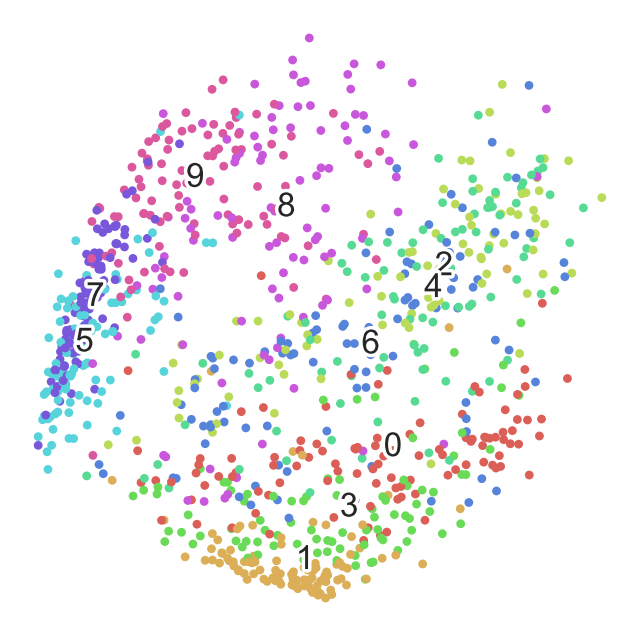

In [17]:
#TODO block 4

pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

fs.fashion_scatter(pca_df[['pca1','pca2']].values, ysubset)

Next, write code to apply TSNE (from `sklearn.manifold`) to the same data subset and visualise the result: 
call the `fit_transform` function to do this. 
Also, add code to time how long it takes, print the value and record it. Be sure to pass the random state `RS` to the TSNE 
constructor.

接下来，编写代码将TSNE（来自`sklearn.manifold`）应用于相同的数据子集并可视化结果：调用`fit_transform`函数来执行此操作。

此外，添加代码来计算需要多长时间，打印该值并记录它。确保将随机状态`RS`传递给TSNE构造函数。

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.086s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 677.018239
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.146038
[t-SNE] KL divergence after 300 iterations: 0.840924


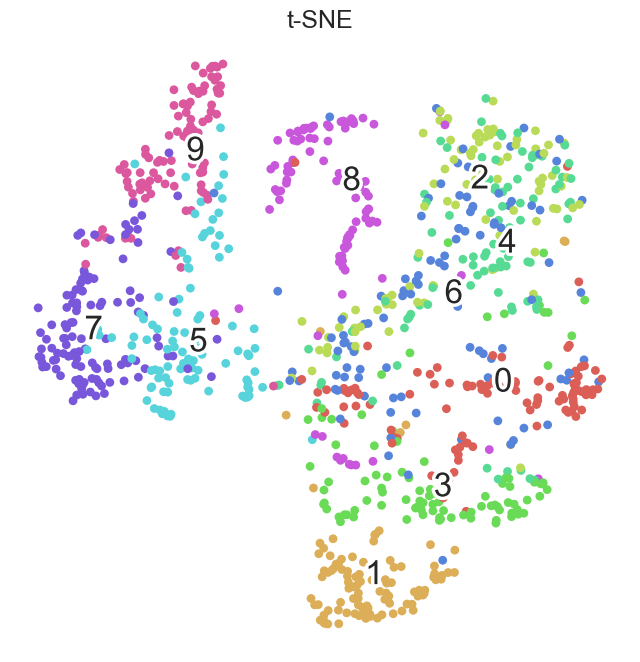

t-SNE done! Time elapsed: 1.0230190753936768 seconds


In [20]:
#TODO block 5
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=RS) # RS=1729,verbose表示是否打印出迭代过程
tsne_results = tsne.fit_transform(xsubset)

# 可视化
fs.fashion_scatter(tsne_results, ysubset)

plt.title('t-SNE')
plt.show()


print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Of course, in the original t-SNE paper, it was recommended to apply the algorithm after reducing the dimensionality of the
data to an intermediate range. Apply PCA again with 50 components 
(a significant reduction from the 784 dimensions of the original data) and then aply TSNE (again setting the random
state). Time how long this takes and display the results. 

当然，在原始t-SNE论文中，建议在将数据的维数降低到中间范围后应用该算法。再次应用50个组件的PCA（从原始数据的784个维降低到一个显著的范围），然后再次应用TSNE（再次设置随机状态）。计算这需要多长时间，并显示结果。

发现使用pca之后再使用t-sne，时间为0.97s。直接使用t-sne时间为1.0s。所以使用pca降维后再使用t-sne，时间更短。

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 636.353225
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.072887
[t-SNE] KL divergence after 300 iterations: 0.823072
t-SNE done! Time elapsed: 0.970597505569458 seconds


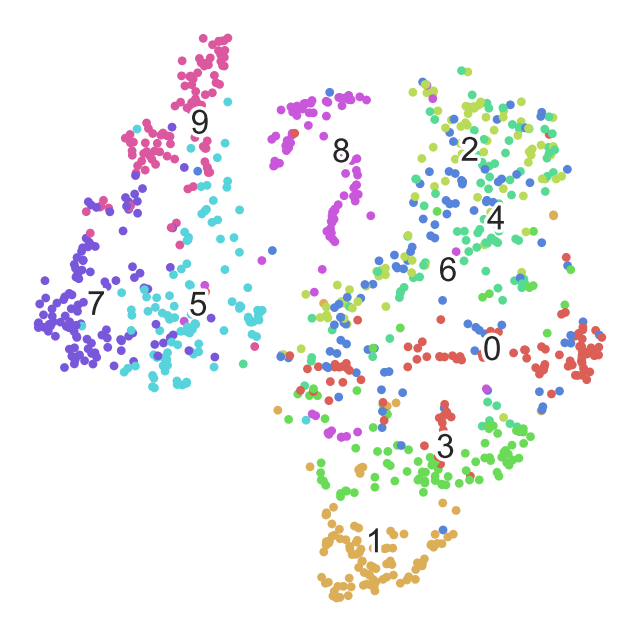

In [21]:
#TODO block 6
time_start = time.time()
pca = PCA(n_components=50)
pca_result = pca.fit_transform(xsubset)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=RS) 
tsne_results = tsne.fit_transform(pca_result)

# 可视化
fs.fashion_scatter(tsne_results, ysubset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


Now run t-SNE with a perplexity value of 2 (the API can be found __[here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)__) and plot the result. Write down what effect reducing this parameter from its default value of 30.0 has had.

现在使用困惑值为2运行t-SNE（可以在此处找到API），并绘制结果。写下将此参数从其默认值30.0减小的效果。

发现困惑度检减小，时间0.4s显著下降。

conclusion：
从你提供的两张t-SNE可视化图像中，我们可以看到不同的`perplexity`值如何影响MNIST手写数字数据集的二维嵌入。这里有几个关键点：

1. **Perplexity的影响**：Perplexity参数可以被视为t-SNE优化过程中考虑的近邻数量。较低的`perplexity`值（如第一个图的`perplexity=2`）可能导致数据点之间的局部结构被过度强调，而高一些的`perplexity`值（如第二个图的`perplexity=30`）可能更好地捕捉数据的全局结构。

2. **聚类的清晰度**：在`perplexity=30`的图中，不同数字的聚类看起来比`perplexity=2`时更加清晰和分离。在后者的情况下，由于perplexity值较小，模型主要关注了更局部的数据结构，这可能导致不同数字之间的界限不那么清晰。

3. **数字的混合**：在`perplexity=2`的图中，一些聚类似乎更加散乱且与其他数字重叠（例如，数字4和9的聚类），这表明低perplexity值可能不足以在这个数据集上揭示有意义的结构。相比之下，`perplexity=30`的图中，尽管某些数字（如4和9）的聚类仍然靠近，但它们之间的边界更加清楚。

4. **可视化质量**：通常，在应用t-SNE时，会对perplexity进行调整，找到一个能够展示数据结构的"甜点"。过低或过高的perplexity都可能导致不理想的可视化效果。在这个例子中，`perplexity=30`提供了一个比`perplexity=2`更平衡的视图，其中局部和全局结构都被适度展现。

5. **选择合适的Perplexity**：选择最佳的`perplexity`值通常需要试验和错误，它应该反映数据的真实邻居数量。一个普通规则是设置perplexity值在5和50之间，但这取决于数据集的大小。

结论是，当`perplexity`较低时，模型可能无法捕捉到足够的全局结构，导致不同类别之间的界限不清晰。增加`perplexity`可以帮助模型在保持局部结构的同时更好地揭示全局结构。但是，这并不是一个严格的规则，因为t-SNE的结果也受到其他参数设置和数据本身的影响。

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 193.254789
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.142899
[t-SNE] KL divergence after 300 iterations: 1.962968
t-SNE done! Time elapsed: 0.4459412097930908 seconds


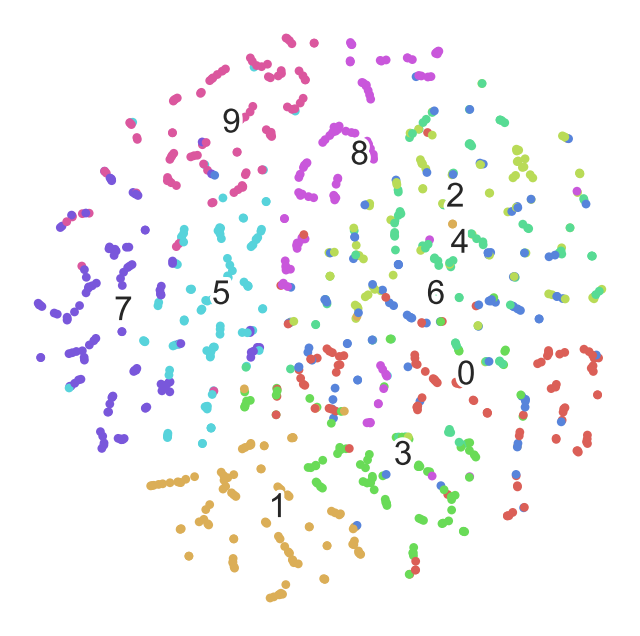

In [26]:
#TODO block 7
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=2, n_iter=300, random_state=RS)
tsne_results = tsne.fit_transform(pca_result)

# 可视化
fs.fashion_scatter(tsne_results, ysubset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

## UMAP

The next task is to create and fit a UMAP model and then project the data.

UMAP is <b>not</b> part of the standard Python packages but has been implemented as a separate library (located 
__[here](https://pypi.org/project/umap-learn/)__). There are several
ways to install the package. The one that I used was to create an Anaconda power shell (an option from the Windows 
application selector) and in that shell to type

下一个任务是创建和拟合UMAP模型，然后投影数据。

UMAP不是标准的Python包，而是作为一个单独的库实现的（位于此处）。有几种安装包的方法。我使用的方法是创建一个Anaconda power shell（从Windows应用程序选择器中选择的一个选项），然后在该shell中输入
```
`
pip install umap-learn
`
### Digit data
We will use the small digit dataset that is part of the sklearn package, for convenience.

我们将使用sklearn包中的小数字数据集，以方便起见。

In [28]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

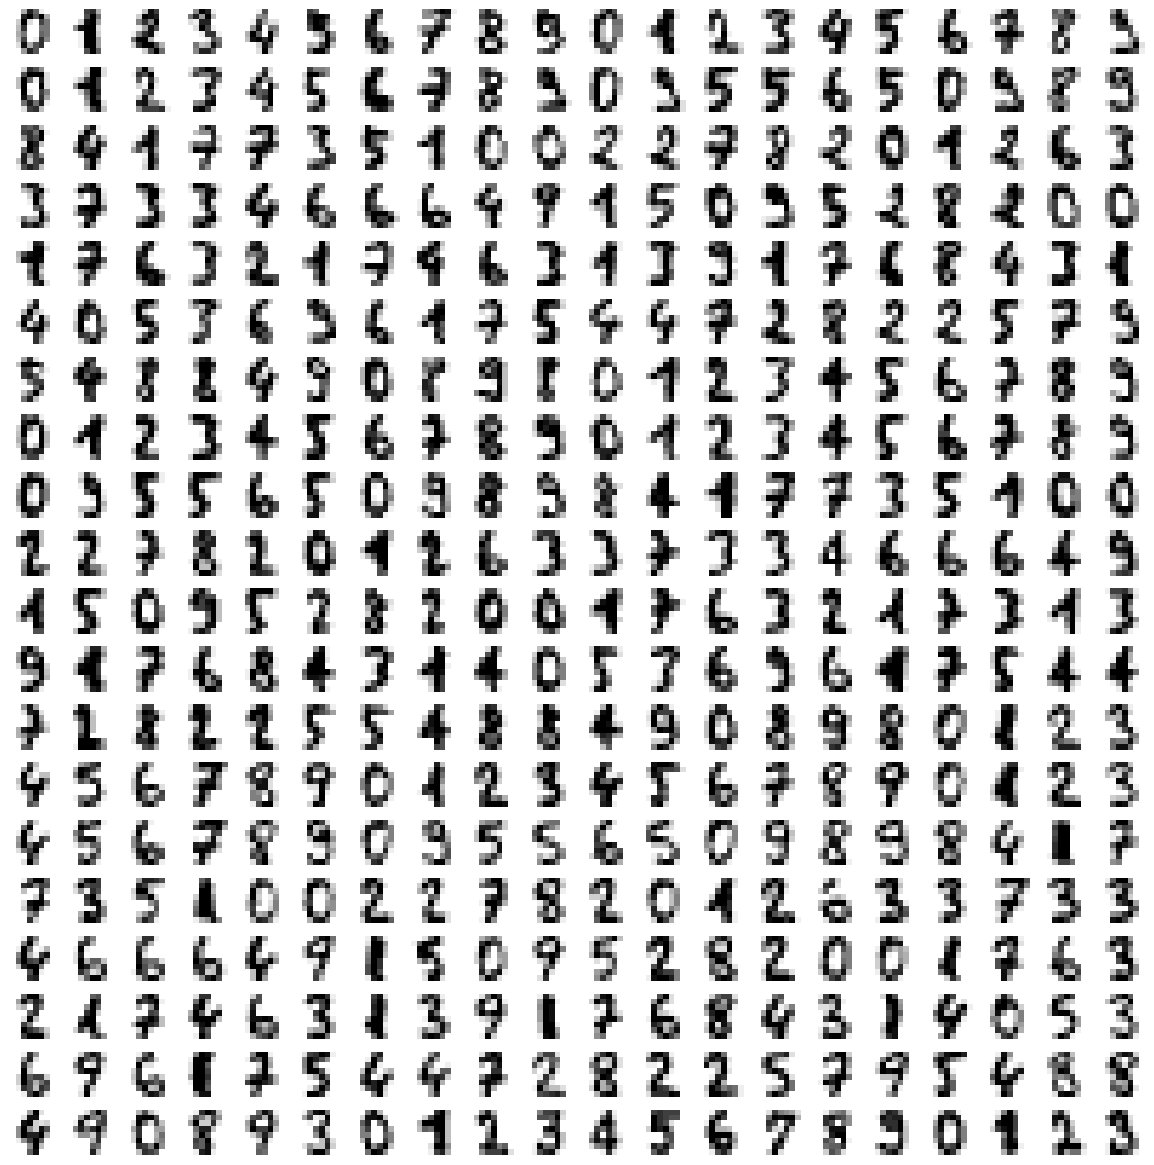

In [29]:
digits = load_digits()
fig, ax_array = plt.subplots(20, 20, figsize=(12, 12))
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01);

Once you have installed the package, call the `fit` and `transform` functions to create an array `embedding` which contains the
embedded data. The UMAP API guide can be found __[here](https://umap-learn.readthedocs.io/en/latest/api.html)__

一旦安装了包，调用`fit`和`transform`函数创建一个包含嵌入数据的数组`embedding`。UMAP API指南可以在此处找到。

In [30]:
#TODO block 8
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(digits.data)



E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


The next block of code plots the data with a colour-coding based on the digit class.

下面的代码块绘制了基于数字类的颜色编码的数据。

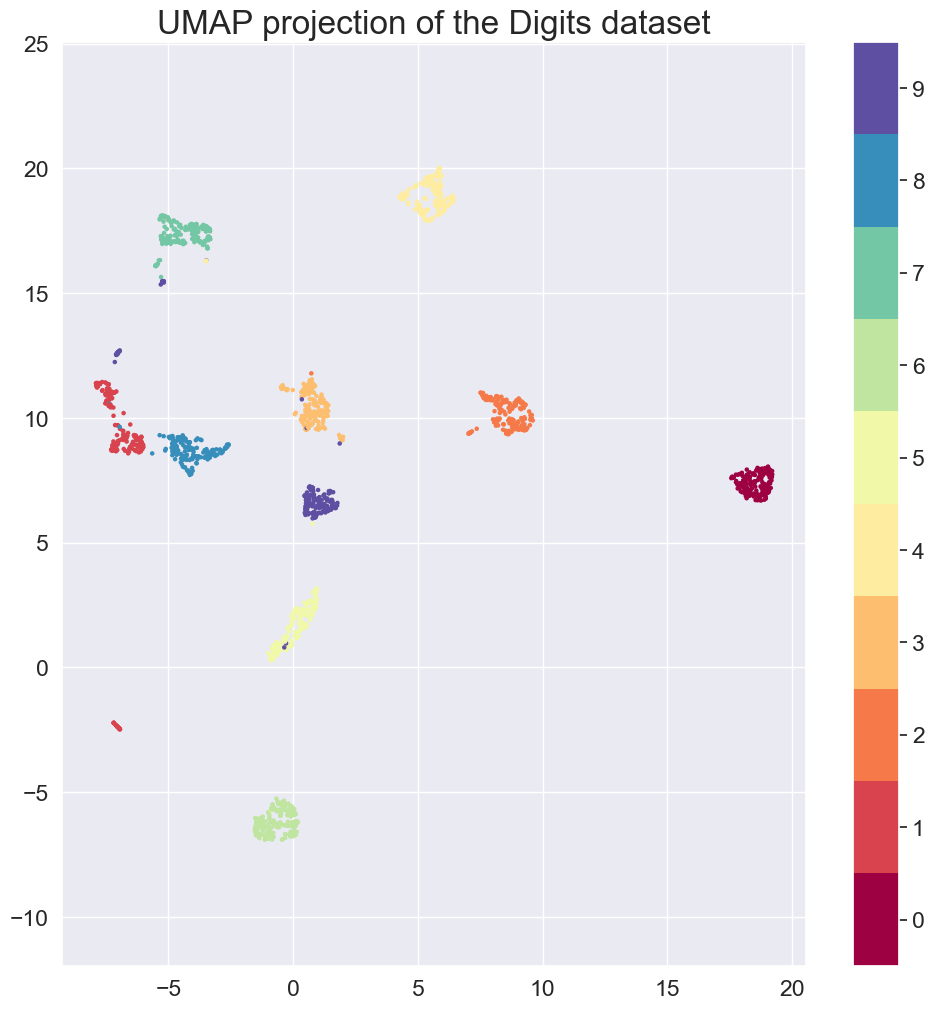

In [33]:
plt.figure(figsize=(12, 12))

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(18.564804077148438, 7.361472129821777, '0'),
  Text(-7.053035259246826, 9.11301040649414, '1'),
  Text(8.621723175048828, 10.197320938110352, '2'),
  Text(0.7290850281715393, 10.394699096679688, '3'),
  Text(5.54683256149292, 18.81761932373047, '4'),
  Text(0.1260310709476471, 1.7082709074020386, '5'),
  Text(-0.6367886662483215, -6.276242256164551, '6'),
  Text(-4.531579971313477, 17.343732833862305, '7'),
  Text(-4.185662269592285, 8.693000793457031, '8'),
  Text(0.7964978218078613, 6.688274383544922, '9')])

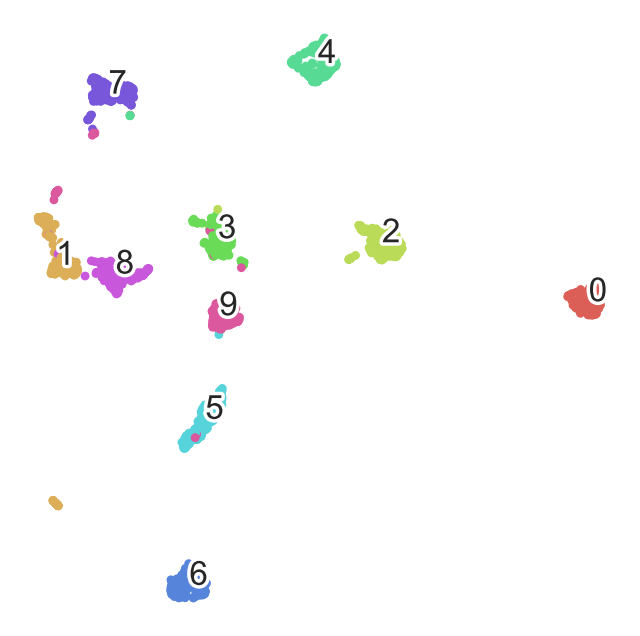

In [34]:
fs.fashion_scatter(embedding, digits.target)

Review this graphic and write down any points of interest.

### Colour cube dataset
We will now use a second dataset to experiment with some of the parameters of the UMAP algorithm. The next block of code defines a function that will be useful to run the experiments.

现在，我们将使用第二个数据集来实验UMAP算法的一些参数。下一个代码块定义了一个函数，该函数对运行实验很有用。

In [35]:
# input: n_neighbors, min_dist, n_components, metric, title
# output: a scatter plot of the UMAP projection

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='', init = 'spectral'):
    fit = umap.UMAP(
        random_state = 42,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        init = init
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)



The next block of code creates a four-dimensional dataset randomly sampled. We interpret each row as a tuple of (R,G,B,a) values specifying a color (and translucency). Thus when we plot low-dimensional representations each point can be colored according to its 4-dimensional value.

下一个代码块创建了一个随机抽样的四维数据集。我们将每一行解释为指定颜色（和半透明度）的（R，G，B，a）值的元组。因此，当我们绘制低维表示时，每个点都可以根据其四维值着色。

In [36]:
# Exploration of parameters
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
np.random.seed(42)
data = np.random.rand(800, 4)

Now fit a UMAP model to the data and transform it into a variable `u`. Time how long it takes.

现在将UMAP模型拟合到数据并将其转换为变量`u`。计算需要多长时间。

In [37]:
# TODO block 9
time_start = time.time()
fit = umap.UMAP(
    random_state = 42,
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric='euclidean',
    init = 'spectral'
)
u = fit.fit_transform(data)
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP done! Time elapsed: 1.4836692810058594 seconds


Now we will carry out experiments using `draw_umap`. Run the next block of code (where we set the number of neigbours to 2) and write down what happens. 

现在，我们将使用`draw_umap`进行实验。运行下一个代码块（在代码块中，我们将邻居的数量设置为2），并写下发生了什么。

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


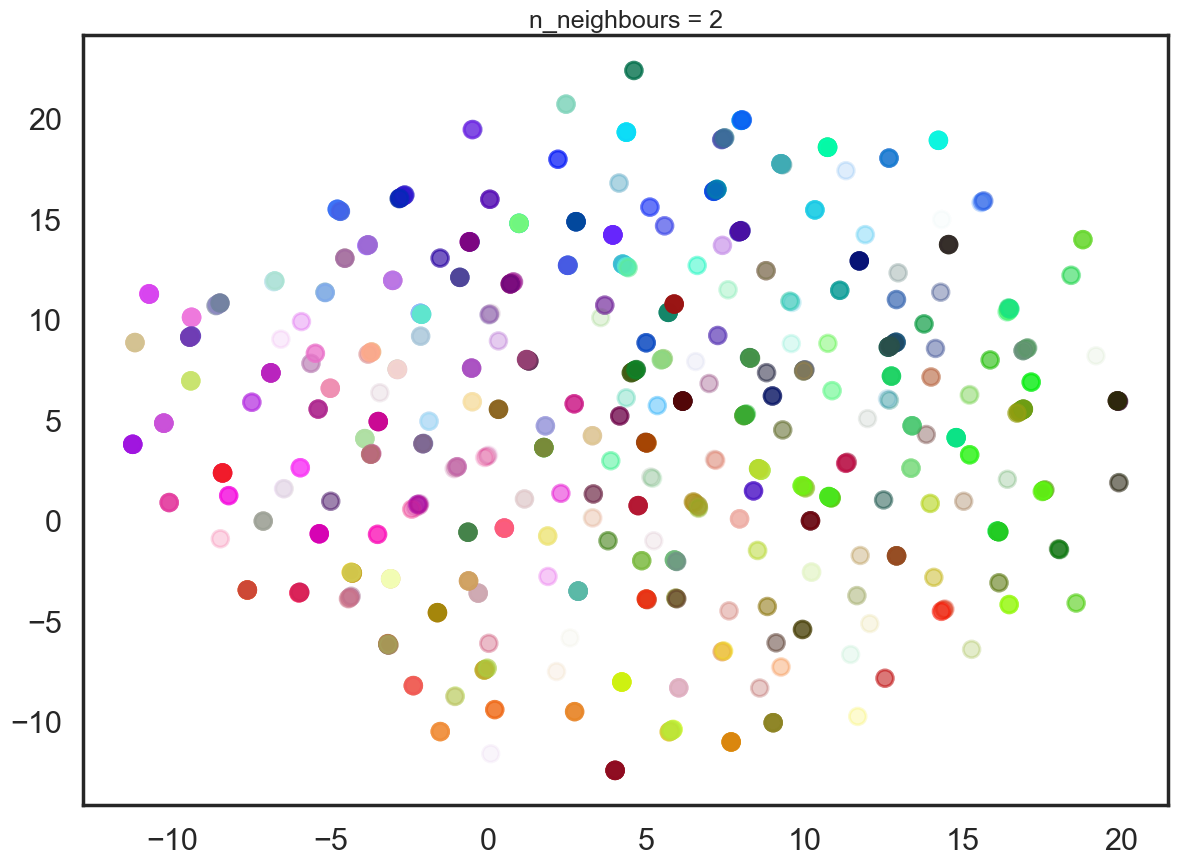

In [38]:
n=2
draw_umap(n, title='n_neighbours = {}'.format(n))

This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighbourhood UMAP considers when attempting to learn the manifold structure of the data. 

Write some code using `draw_umap` to create scatter plots using UMAP for 5, 10, 50, 100, 200 neighbours. Write down what you notice about the effects of this parameter on the results.

这个参数控制UMAP在数据中平衡局部与全局结构。它通过限制UMAP在尝试学习数据流形结构时考虑的局部邻域的大小来实现这一点。

使用`draw_umap`编写一些代码，使用UMAP创建散点图，以便使用5、10、50、100、200个邻居。写下你对这个参数对结果的影响的注意事项。

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use n

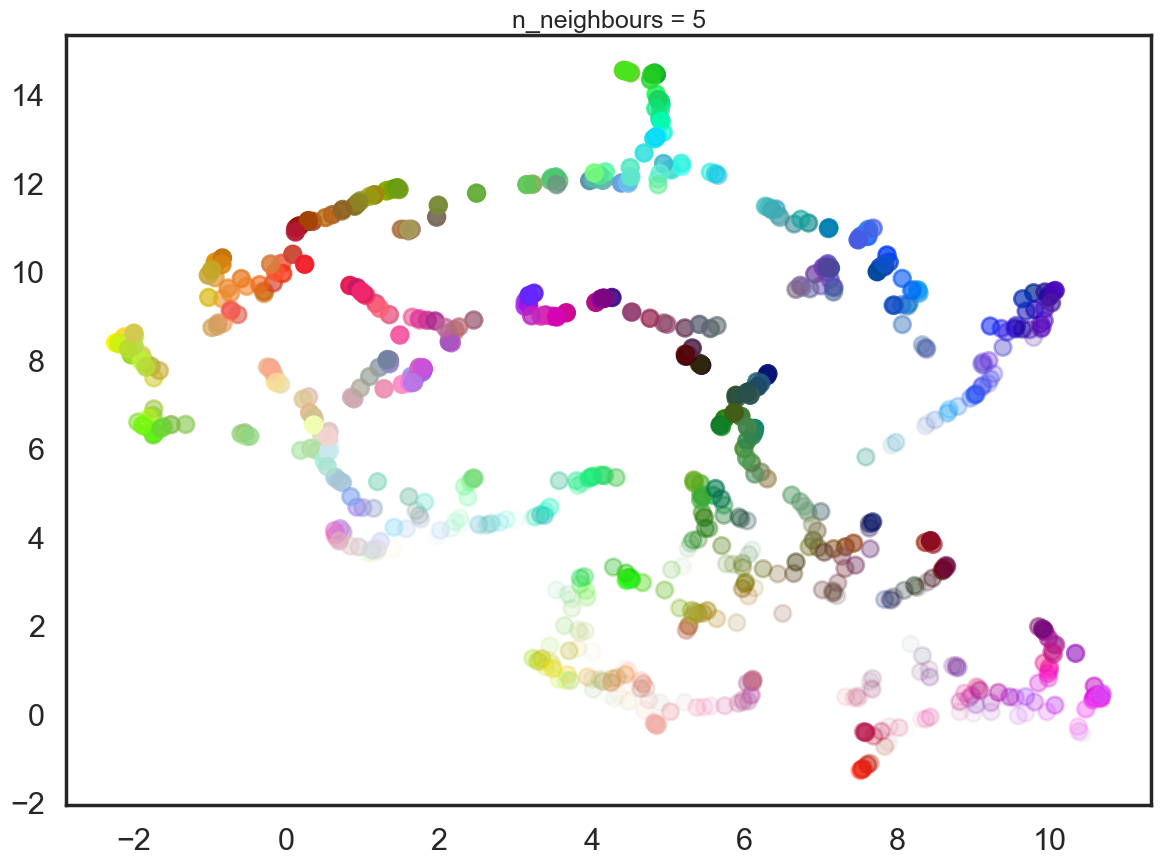

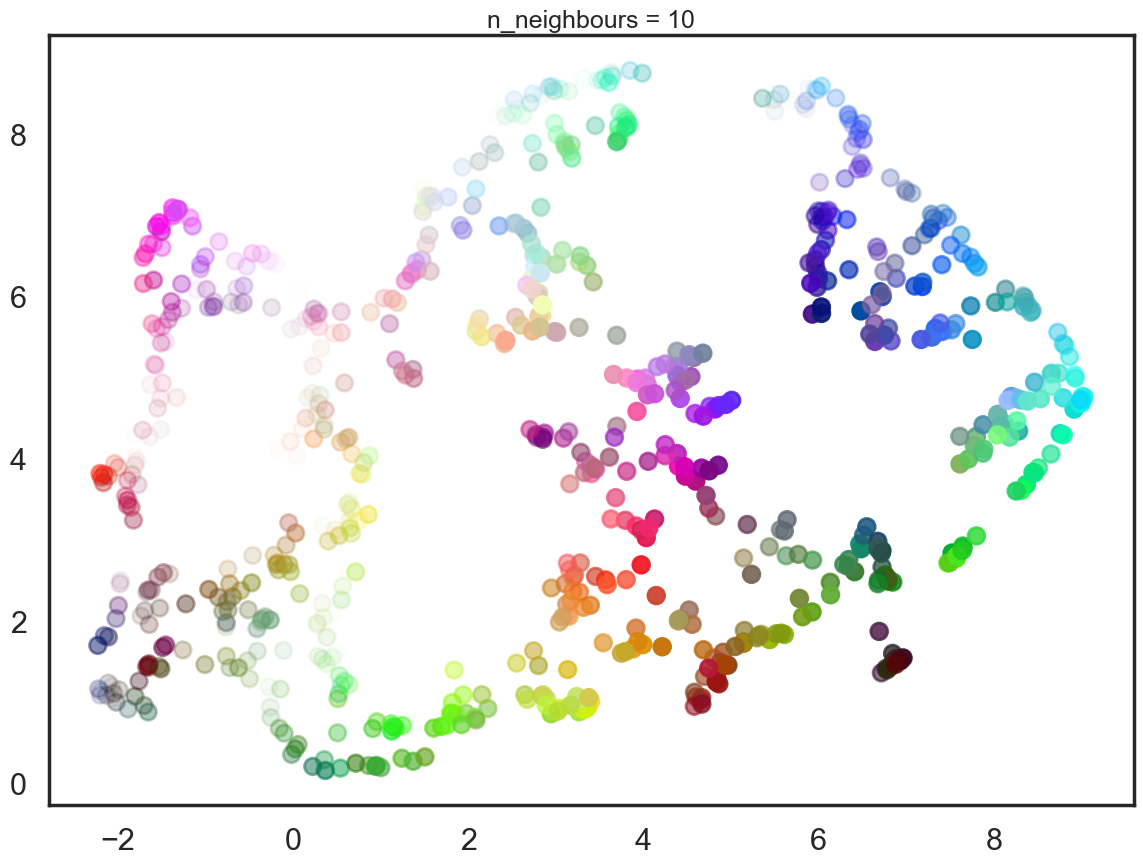

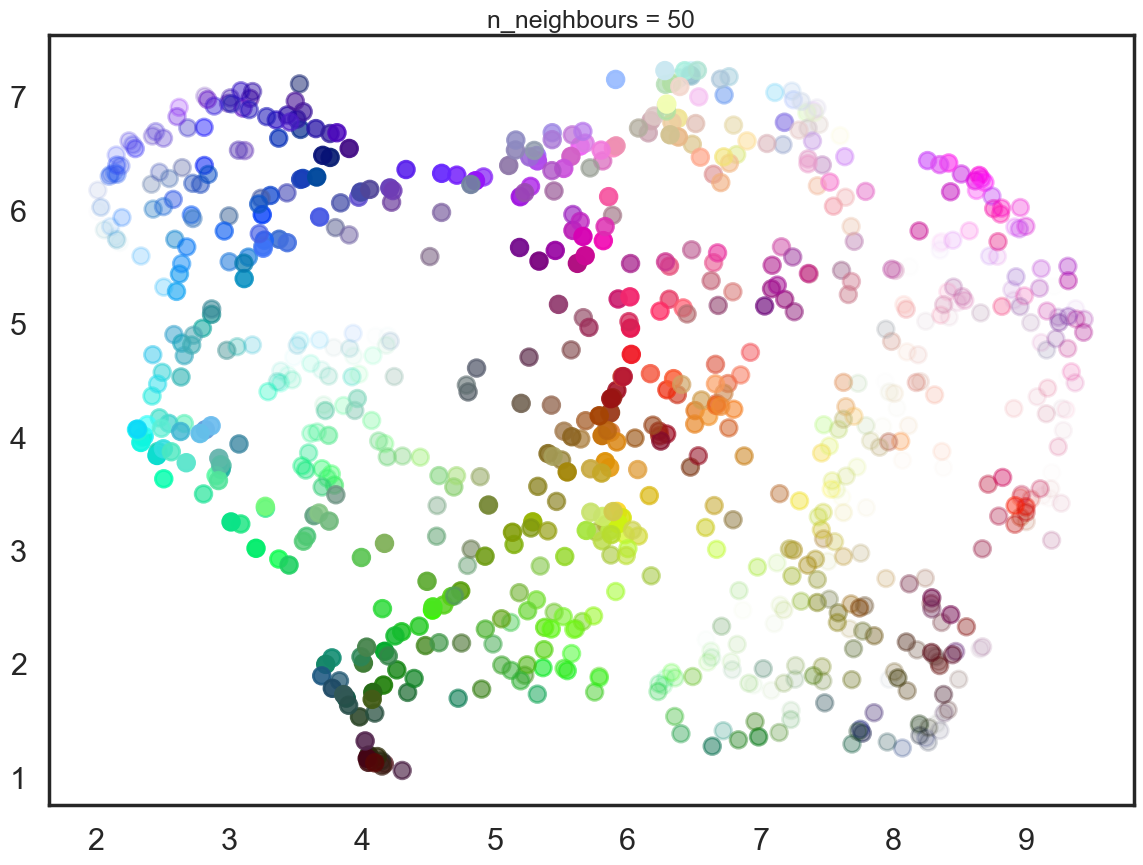

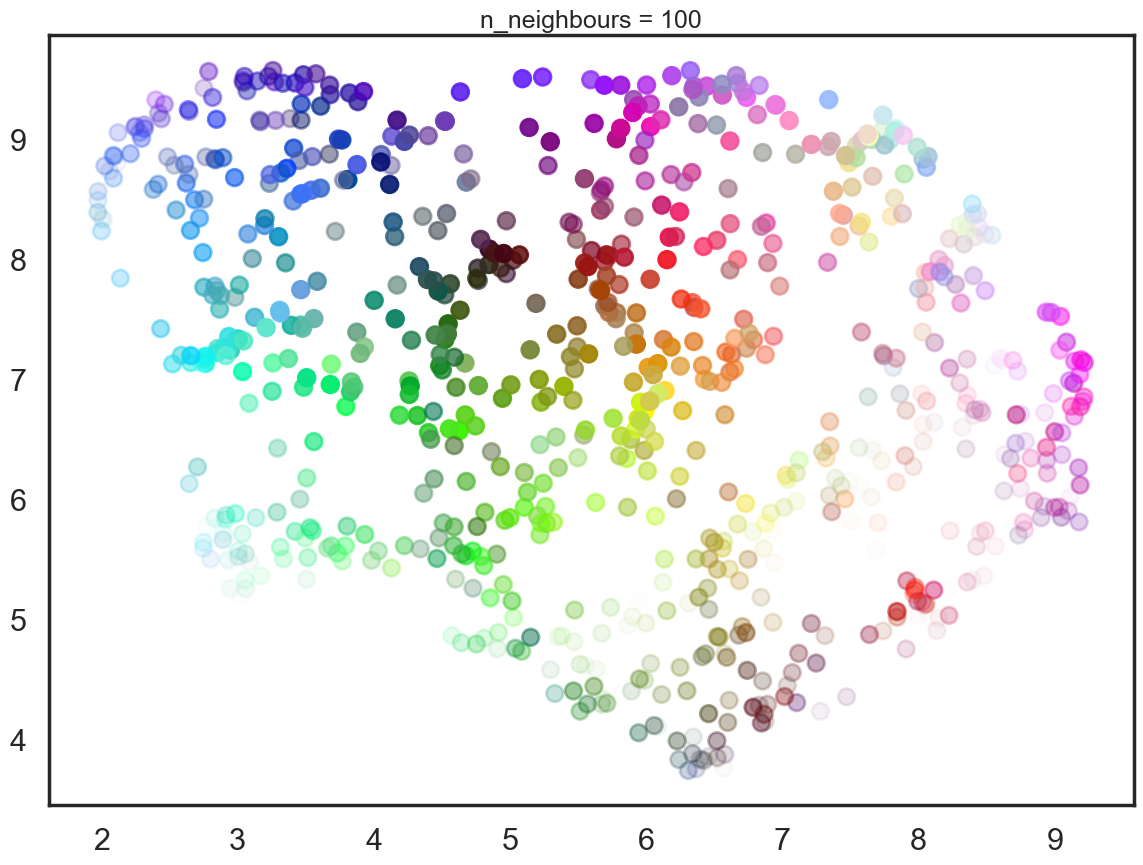

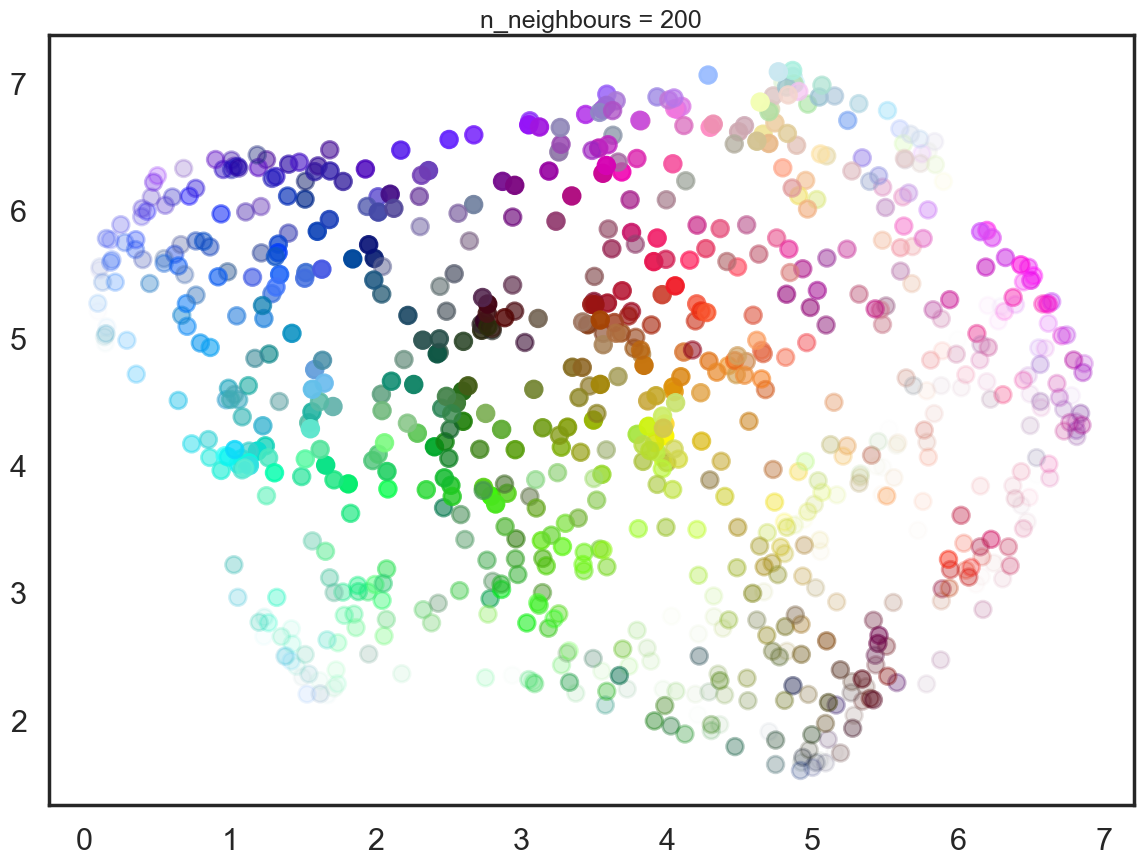

In [39]:
#TODO block 10
draw_umap(5, title='n_neighbours = {}'.format(5))
draw_umap(10, title='n_neighbours = {}'.format(10))
draw_umap(50, title='n_neighbours = {}'.format(50))
draw_umap(100, title='n_neighbours = {}'.format(100))
draw_umap(200, title='n_neighbours = {}'.format(200))


Write some code to vary the paramet `min_dist` over values 0.0, 0.1, 0.25, 0.8, and 0.99. Write down what you notice about the effects of the this parameter on the results. The `min_dist` parameter controls how tightly UMAP is allowed to pack points together. It defines the minimum distance apart that points are allowed to be in the low-dimensional representation.

编写一些代码，以便在值0.0、0.1、0.25、0.8和0.99上变化参数`min_dist`。写下你对这个参数对结果的影响的注意事项。`min_dist`参数控制UMAP允许点之间紧密打包的程度。它定义了允许在低维表示中的点之间的最小距离。

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use n

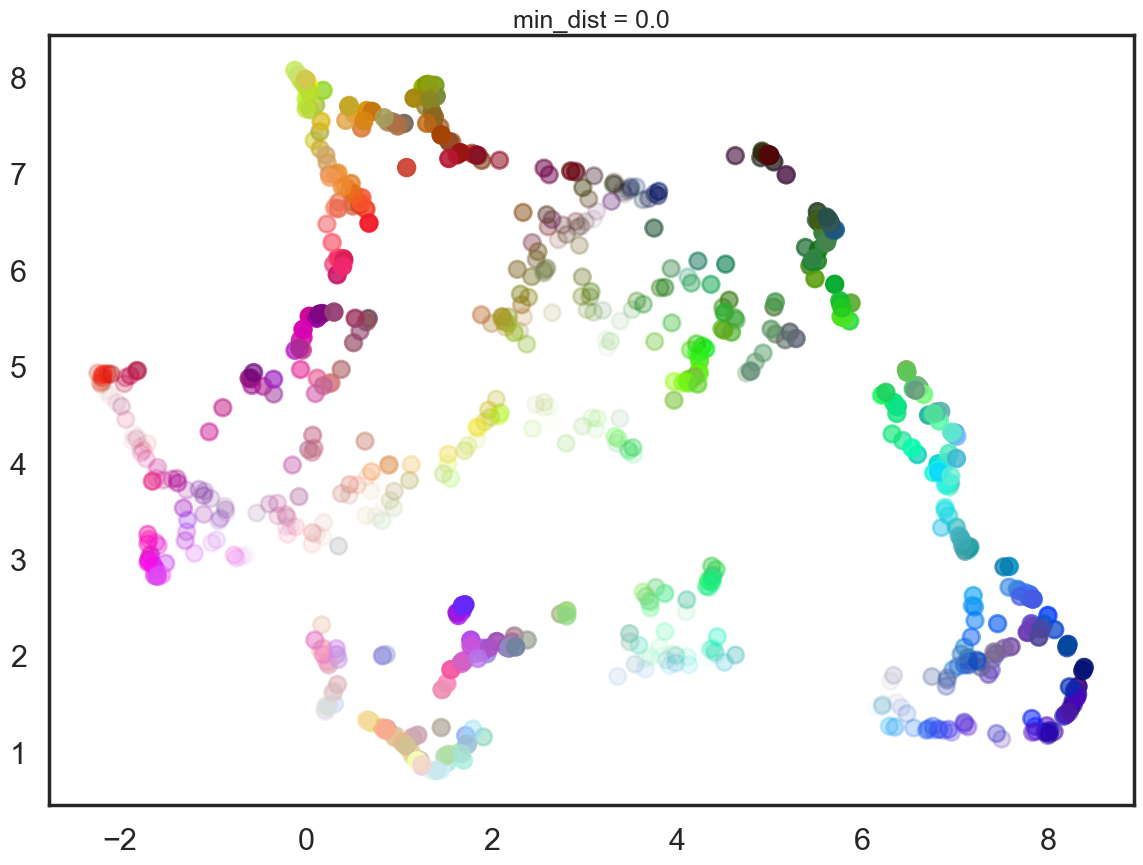

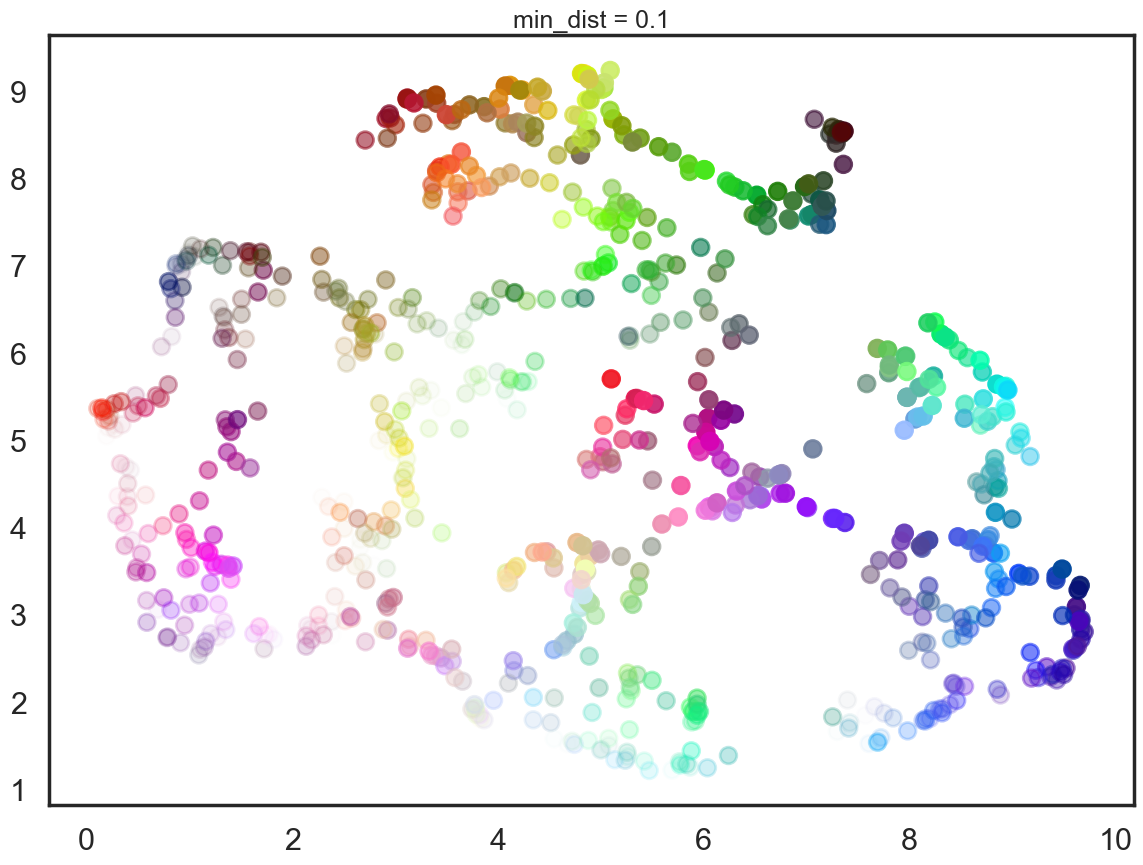

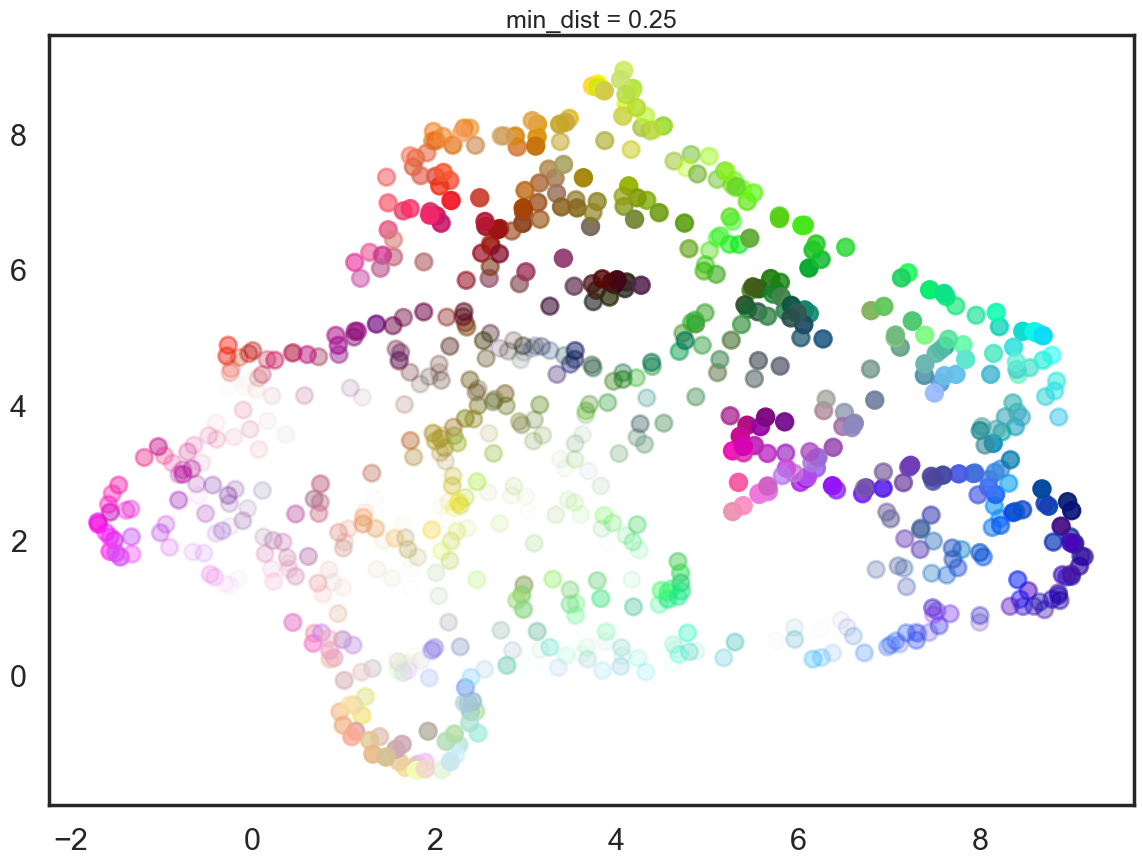

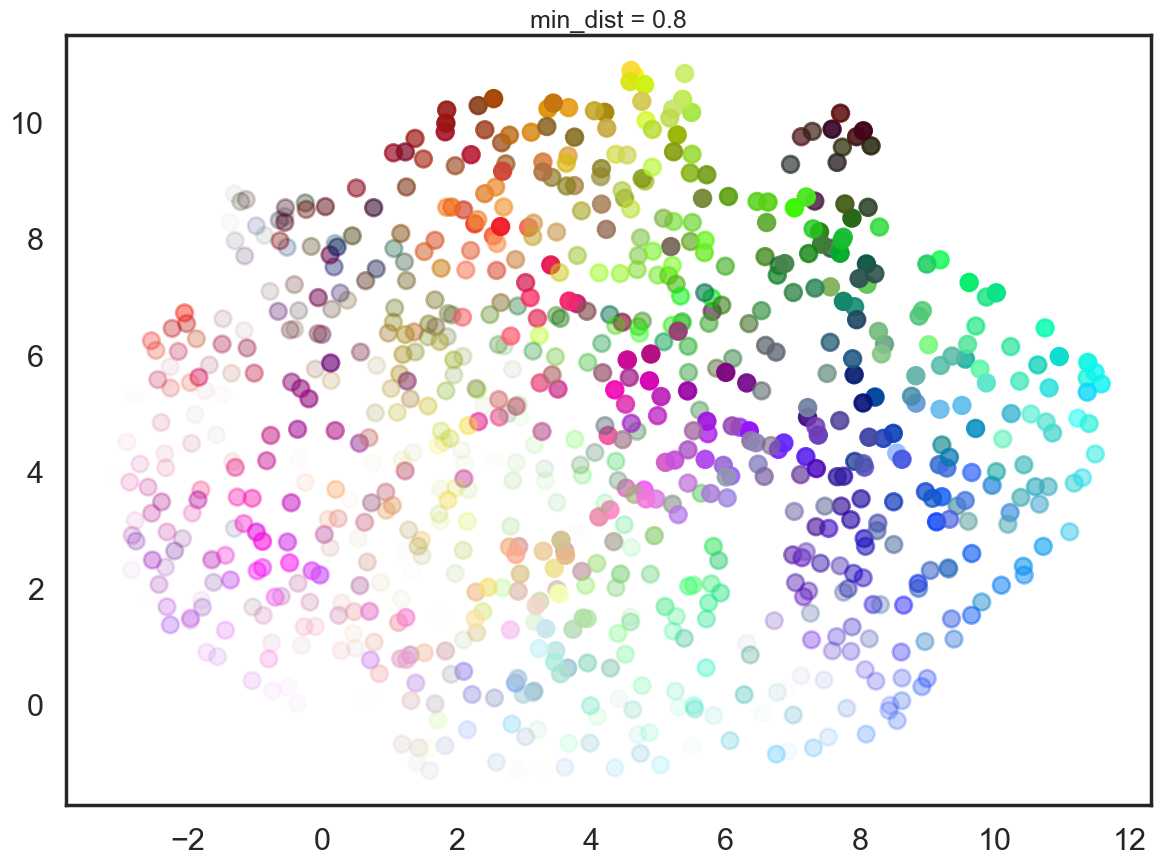

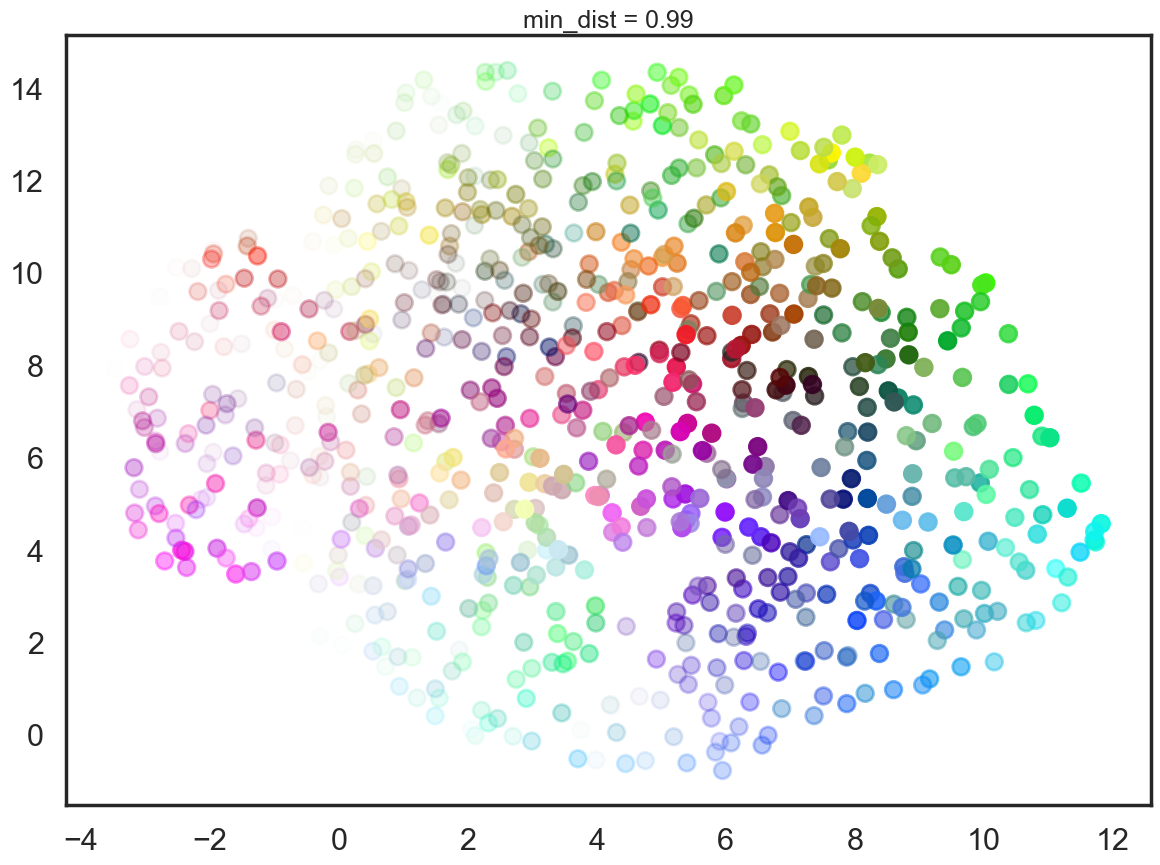

In [40]:
# TODO block 11

draw_umap(min_dist=0.0, title='min_dist = {}'.format(0.0))
draw_umap(min_dist=0.1, title='min_dist = {}'.format(0.1))
draw_umap(min_dist=0.25, title='min_dist = {}'.format(0.25))
draw_umap(min_dist=0.8, title='min_dist = {}'.format(0.8))
draw_umap(min_dist=0.99, title='min_dist = {}'.format(0.99))
